In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt
import statsmodels.formula.api as sm
import warnings 
import itertools

from sklearn.model_selection import train_test_split

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("data/HR_Analytics.csv")

In [5]:
#Load data
df=pd.read_csv("data/HR_Analytics.csv")
df = pd.get_dummies(df, columns = ["Attrition"])
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,0,8,0,1,6,4,0,5,0,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,1,10,3,3,10,7,1,7,1,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,0,7,3,3,0,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,0,8,3,3,8,7,3,0,1,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,1,6,3,3,2,2,2,2,1,0


In [6]:
#Keep the dummy column where employees leaving = 1, because there are far less of them and we want to minimize FNR and recall
df = df.drop(["Attrition_No"], axis = 1)

In [7]:
#Splitting up data into train and test data - train has 70% of values and test has 30%
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 1029
No. of testing examples: 441


In [8]:
#Printing the ratio of No's and Yes's to the response variable (Attrition) for train and test to make sure they are similar
print(train.Attrition_Yes.value_counts()[1]/train.Attrition_Yes.value_counts()[0])
print(test.Attrition_Yes.value_counts()[1]/test.Attrition_Yes.value_counts()[0])

0.1937354988399072
0.18867924528301888


In [9]:
#Drop employee count, over 18 and standard hours because they are the same value for every person
train = train.drop(["EmployeeCount", "StandardHours", "Over18"], axis = 1)
test = test.drop(["EmployeeCount", "StandardHours", "Over18"], axis = 1)
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes'],
      dtype='object')

## Relevant Predictors based on forward stepwise
- OverTime - *binary, no transformation*
- BusinessTravel
- EducationField
- Gender - *binary, no transformation*
- JobLevel
- StockOptionLevel
- JobInvolvement
- NumCompaniesWorked
- JobSatisfaction
- EnvironmentSatisfaction
- WorkLifeBalance
- Age
- DistanceFromHome
- YearsSinceLastPromotion
- YearsInCurrentRole	
- YearsAtCompany	
- TotalWorkingYears	
- YearsWithCurrManager	
- PercentSalaryHike	

In [122]:
train.StockOptionLevel.value_counts()

0    439
1    421
2    107
3     62
Name: StockOptionLevel, dtype: int64

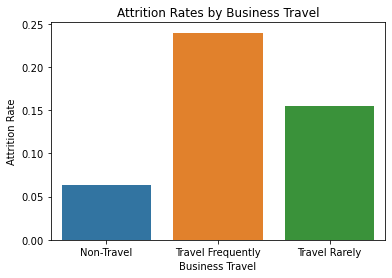

In [33]:
BusinessTravel_data = train.groupby('BusinessTravel')['Attrition_Yes'].agg([("attrition_rate", "mean"), ("count", "count")]).reset_index(drop = False)
# Bar plot
sns.barplot(x=BusinessTravel_data.index, y=BusinessTravel_data["attrition_rate"])
plt.title('Attrition Rates by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Attrition Rate')
plt.xticks(ticks=[0,1,2], labels=["Non-Travel", "Travel Frequently", "Travel Rarely"])
plt.show()

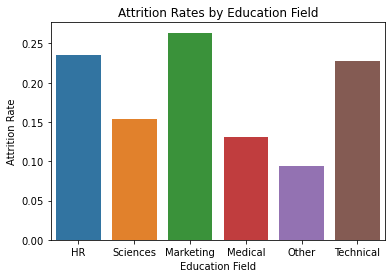

In [37]:
EducationField_data = train.groupby('EducationField')['Attrition_Yes'].agg([("attrition_rate", "mean"), ("count", "count")]).reset_index(drop = False)
# Bar plot
sns.barplot(x=EducationField_data.index, y=EducationField_data.attrition_rate)
plt.title('Attrition Rates by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Attrition Rate')
plt.xticks(ticks=[0,1,2,3,4,5], labels=["HR", "Sciences", "Marketing", "Medical", "Other", "Technical"])
plt.show()

Text(0.5, 1.0, 'Attrition Percent based on Job Level')

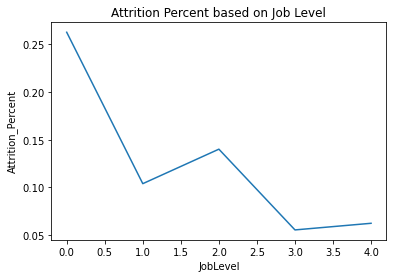

In [15]:
JobLevel_data = train.groupby('JobLevel')['Attrition_Yes'].agg([('Attrition_Percent','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = JobLevel_data.index, y= JobLevel_data['Attrition_Percent'])
plt.xlabel('JobLevel')
plt.title("Attrition Percent based on Job Level")

Text(0.5, 1.0, 'Attrition Percent based on Stock Option Level')

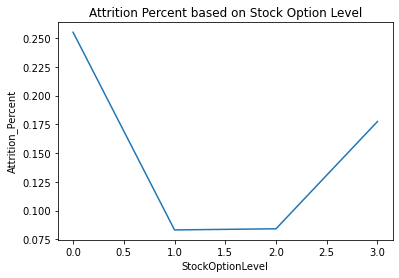

In [40]:
Stock_data = train.groupby('StockOptionLevel')['Attrition_Yes'].agg([('Attrition_Percent','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = Stock_data.index, y= Stock_data['Attrition_Percent'])
plt.xlabel('StockOptionLevel')
plt.title("Attrition Percent based on Stock Option Level")

Text(0.5, 1.0, 'Attrition Percent based on Job Involvement')

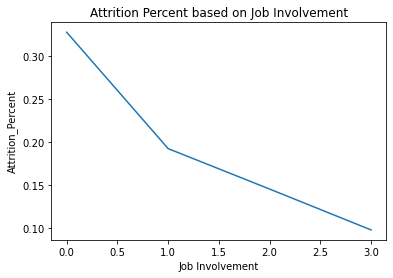

In [44]:
JobInvolvement_data = train.groupby('JobInvolvement')['Attrition_Yes'].agg([('Attrition_Percent','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = JobInvolvement_data.index, y= JobInvolvement_data['Attrition_Percent'])
plt.xlabel('Job Involvement')
plt.title("Attrition Percent based on Job Involvement")

Text(0.5, 1.0, 'Attrition Percent based on Number of Companies Worked')

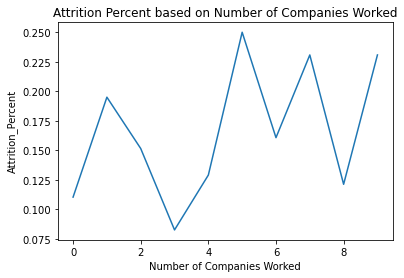

In [46]:
NumCompaniesWorked_data = train.groupby('NumCompaniesWorked')['Attrition_Yes'].agg([('Attrition_Percent','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = NumCompaniesWorked_data.index, y= NumCompaniesWorked_data['Attrition_Percent'])
plt.xlabel('Number of Companies Worked')
plt.title("Attrition Percent based on Number of Companies Worked")

Text(0.5, 1.0, 'Attrition Percent based on JobSatisfaction')

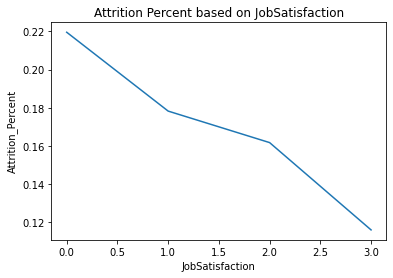

In [48]:
JobSatisfaction_data = train.groupby('JobSatisfaction')['Attrition_Yes'].agg([('Attrition_Percent','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = JobSatisfaction_data.index, y= JobSatisfaction_data['Attrition_Percent'])
plt.xlabel('JobSatisfaction')
plt.title("Attrition Percent based on JobSatisfaction")

Text(0.5, 1.0, 'Attrition Percent based on EnvironmentSatisfaction')

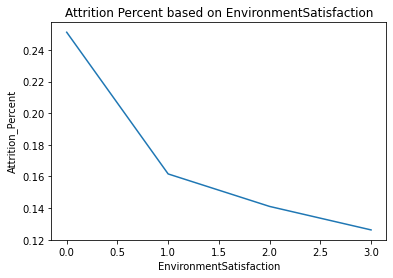

In [49]:
EnvironmentSatisfaction_data = train.groupby('EnvironmentSatisfaction')['Attrition_Yes'].agg([('Attrition_Percent','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = EnvironmentSatisfaction_data.index, y= EnvironmentSatisfaction_data['Attrition_Percent'])
plt.xlabel('EnvironmentSatisfaction')
plt.title("Attrition Percent based on EnvironmentSatisfaction")

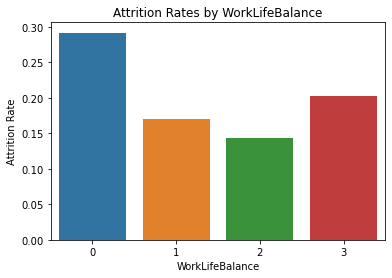

In [51]:
WorkLifeBalance_data = train.groupby('WorkLifeBalance')['Attrition_Yes'].agg([("attrition_rate", "mean"), ("count", "count")]).reset_index(drop = False)
# Bar plot
sns.barplot(x=WorkLifeBalance_data.index, y=WorkLifeBalance_data["attrition_rate"])
plt.title('Attrition Rates by WorkLifeBalance')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Attrition Rate')
plt.show()

Text(0.5, 1.0, 'Attrition Percent based on Age')

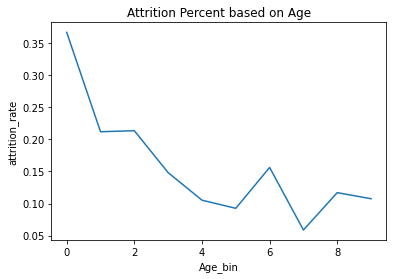

In [121]:
binned_age = pd.qcut(train['Age'],10,retbins=True)
train['age_binned'] = binned_age[0]
age_data = train.groupby('age_binned')['Attrition_Yes'].agg([('attrition_rate','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = age_data.index, y= age_data['attrition_rate'])
plt.xlabel('Age_bin')
plt.title("Attrition Percent based on Age")

Text(0.5, 1.0, 'Attrition Percent based on DistanceFromHome')

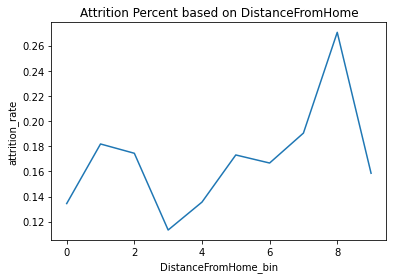

In [120]:
binned_distance = pd.qcut(train['DistanceFromHome'],12,retbins=True, duplicates="drop")
train['distance_binned'] = binned_distance[0]
distance_data = train.groupby('distance_binned')['Attrition_Yes'].agg([('attrition_rate','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = distance_data.index, y= distance_data['attrition_rate'])
plt.xlabel('DistanceFromHome_bin')
plt.title("Attrition Percent based on DistanceFromHome")

Text(0.5, 1.0, 'Attrition Percent based on Years Since Last Promotion')

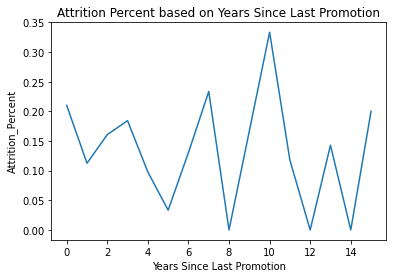

In [76]:
promotion_data = train.groupby('YearsSinceLastPromotion')['Attrition_Yes'].agg([('Attrition_Percent','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = promotion_data.index, y= promotion_data['Attrition_Percent'])
plt.xlabel('Years Since Last Promotion')
plt.title("Attrition Percent based on Years Since Last Promotion")

Text(0.5, 1.0, 'Attrition Percent based on YearsInCurrentRole')

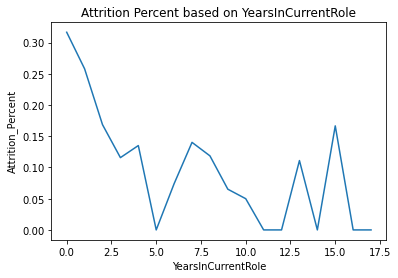

In [82]:
YearsInCurrentRole_data = train.groupby('YearsInCurrentRole')['Attrition_Yes'].agg([('Attrition_Percent','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = YearsInCurrentRole_data.index, y= YearsInCurrentRole_data['Attrition_Percent'])
plt.xlabel('YearsInCurrentRole')
plt.title("Attrition Percent based on YearsInCurrentRole")

Text(0.5, 1.0, 'Attrition Percent based on YearsInCurrentRole')

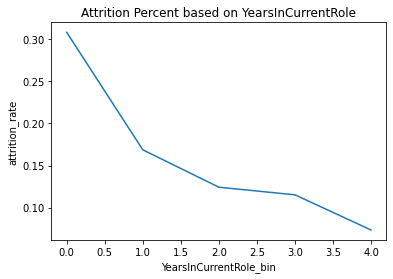

In [119]:
binned_currentrole = pd.qcut(train['YearsInCurrentRole'],5,retbins=True)
train['currentrole_binned'] = binned_currentrole[0]
currentrole_data = train.groupby('currentrole_binned')['Attrition_Yes'].agg([('attrition_rate','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = currentrole_data.index, y= currentrole_data['attrition_rate'])
plt.xlabel('YearsInCurrentRole_bin')
plt.title("Attrition Percent based on YearsInCurrentRole")

Text(0.5, 1.0, 'Attrition Percent based on YearsAtCompany')

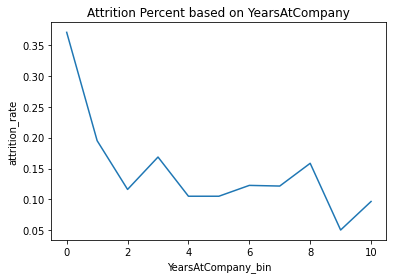

In [118]:
binned_company = pd.qcut(train['YearsAtCompany'],11,retbins=True)
train['company_binned'] = binned_company[0]
company_data = train.groupby('company_binned')['Attrition_Yes'].agg([('attrition_rate','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = company_data.index, y= company_data['attrition_rate'])
plt.xlabel('YearsAtCompany_bin')
plt.title("Attrition Percent based on YearsAtCompany")

Text(0.5, 1.0, 'Attrition Percent based on TotalWorkingYears')

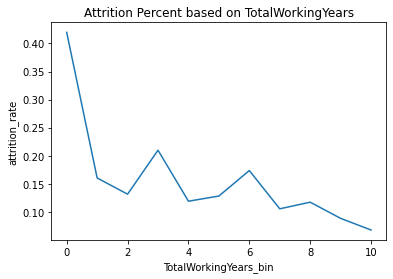

In [117]:
binned_workingyears = pd.qcut(train['TotalWorkingYears'],11,retbins=True)
train['workingyears_binned'] = binned_workingyears[0]
workingyears_data = train.groupby('workingyears_binned')['Attrition_Yes'].agg([('attrition_rate','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = workingyears_data.index, y= workingyears_data['attrition_rate'])
plt.xlabel('TotalWorkingYears_bin')
plt.title("Attrition Percent based on TotalWorkingYears")

Text(0.5, 1.0, 'Attrition Percent based on YearsWithCurrManager')

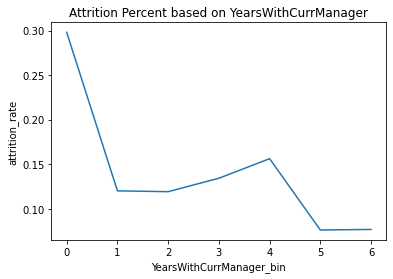

In [116]:
binned_YearsWithCurrManager = pd.qcut(train['YearsWithCurrManager'],10,retbins=True, duplicates="drop")
train['YearsWithCurrManager_binned'] = binned_YearsWithCurrManager[0]
YearsWithCurrManager_data = train.groupby('YearsWithCurrManager_binned')['Attrition_Yes'].agg([('attrition_rate','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = YearsWithCurrManager_data.index, y= YearsWithCurrManager_data['attrition_rate'])
plt.xlabel('YearsWithCurrManager_bin')
plt.title("Attrition Percent based on YearsWithCurrManager")

Text(0.5, 1.0, 'Attrition Percent based on PercentSalaryHike')

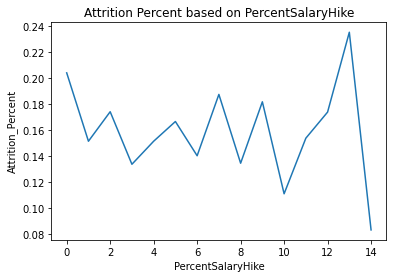

In [115]:
PercentSalaryHike_data = train.groupby('PercentSalaryHike')['Attrition_Yes'].agg([('Attrition_Percent','mean'),('count','count')]).reset_index(drop=False)
sns.lineplot(x = PercentSalaryHike_data.index, y= PercentSalaryHike_data['Attrition_Percent'])
plt.xlabel('PercentSalaryHike')
plt.title("Attrition Percent based on PercentSalaryHike")

# Key Takeaways/Possible Transformations
- Quadratic transformation of BusinessTravel (maybe?)
- Quadratic transformation of StockOptionLevel
- Log transformation of YearsAtCompany
- Log transformation of Total Working Years